GROUP 36 PROJECT PROPOSAL

Analyzing the Effect of Different Attributes on Heart Health: Using Cleveland Heart Disease Data

1. Research Question

What is the probablity of a person getting heart disease?

2. Introduction

As of 2018, 30.3 million U.S. adults are diagnosed with heart disease. Heart disease is a group of conditions that affect the structure or function of the heart. The four most common types of heart disease are coronary artery disease, heart valve disease, heart failure, and arrhythmia. This project aims to predict a person's likelihood of getting heart disease using the attributes, age, sex, cholesterol level, blood sugar level, chest pain, and resting blood pressure. The project will produce a predictor that has been trained with multiple folds of data so that it can accurately predict a person’s likelihood of getting heart disease. The data set given to us is from the Cleveland database primarily focuses on 14 attributes: age, sex, chest pain type, resting blood pressure, cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, ST depression induced by exercise relative to rest,  number of major vessels, thal, and diagnosis of heart disease.

3. Preliminary Exploratory Data Analysis

Import Libraries

In [1]:
library(tidyverse)
library(tidymodels)
library(RColorBrewer)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

Preview Data

In [2]:
dir.create("data_for_project")

url <- "https://raw.githubusercontent.com/slakhwar/grp-project/main/processed.cleveland.csv"

download.file(url, destfile ="data_for_project/processed.cleveland.csv")
cleveland_data <- read.csv("data_for_project/processed.cleveland.csv")

cleveland_p_data <- cleveland_data %>%
 select(age, sex, cp..chest.pain.type., trestbps..resting.blood.pressure., chol..serum.cholestoral.in.mg.dl., fbs..fasting.blood.sugar...120.mg.dl.,num..diagnosis.of.heart.disease..angiographic.disease.status..)

head(cleveland_p_data, 10)

Warning message in dir.create("data_for_project"):
“'data_for_project' already exists”


,age,sex,cp..chest.pain.type.,trestbps..resting.blood.pressure.,chol..serum.cholestoral.in.mg.dl.,fbs..fasting.blood.sugar...120.mg.dl.,num..diagnosis.of.heart.disease..angiographic.disease.status..
,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,63,1,1,145,233,1,0
2,67,1,4,160,286,0,2
3,67,1,4,120,229,0,1
4,37,1,3,130,250,0,0
5,41,0,2,130,204,0,0
6,56,1,2,120,236,0,0
7,62,0,4,140,268,0,3
8,57,0,4,120,354,0,0
9,63,1,4,130,254,0,2


Summary Statistics Table

In [3]:
cleveland_p_data_split <- initial_split(cleveland_data, prop=0.75, strata = age)
cleveland_p_data_train <- training(cleveland_p_data_split)
cleveland_p_data_test <- testing(cleveland_p_data_split)

total_rows <- cleveland_p_data_train %>%
 count() %>%
 pull()

gender_percent_table <- cleveland_p_data_train %>%
 group_by(sex) %>%
 summarise(percent = n()*100/total_rows)
gender_percent_table

asymptomatic_cp_hd <- cleveland_p_data_train %>%
  select(age, sex, cp..chest.pain.type., num..diagnosis.of.heart.disease..angiographic.disease.status..)
head(asymptomatic_cp_hd, 10)

`summarise()` ungrouping output (override with `.groups` argument)



sex,percent
<int>,<dbl>
0,32.75109
1,67.24891


,age,sex,cp..chest.pain.type.,num..diagnosis.of.heart.disease..angiographic.disease.status..
,<int>,<int>,<int>,<int>
1,63,1,1,0
2,67,1,4,2
3,67,1,4,1
4,37,1,3,0
5,41,0,2,0
7,62,0,4,3
8,57,0,4,0
9,63,1,4,2
10,53,1,4,1


Visualization

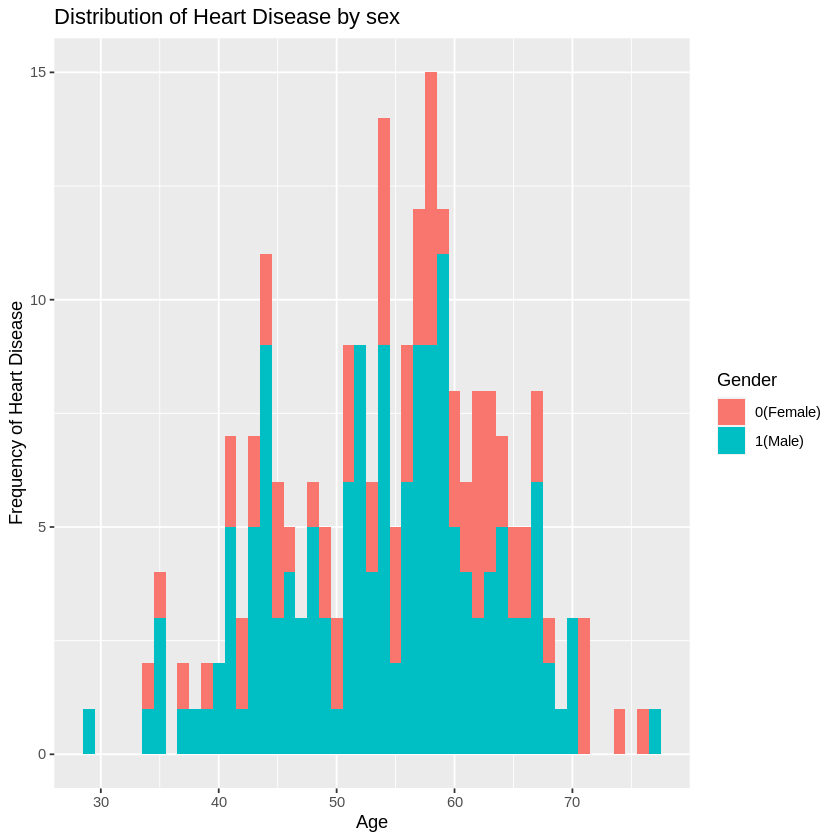

In [ ]:
hd_plot <- ggplot(cleveland_p_data_train, aes(x=age, fill=as_factor(sex))) +
 geom_histogram(binwidth=1)+
 labs(x="Age", y="Frequency of Heart Disease", title="Distribution of Heart Disease by sex") +
 scale_fill_discrete(name = "Gender", labels = c("0(Female)","1(Male)"))


hd_plot


hd_cp_plot <- ggplot(cleveland_p_data_train, aes(x=num..diagnosis.of.heart.disease..angiographic.disease.status.., fill=as_factor(cp..chest.pain.type.))) +
 geom_histogram(binwidth=1) +
 labs(x="Stages of Heart Disease(angiographic disease status)", y="Frequency of Heart Disease", title="Distribution of Stages of Heart Disease by Types of Chest Pains")+
 scale_fill_discrete(name = "Types of Chest Pains", labels = c("1(typical angina)","2(atypical angina)","3(non-anginal pain)","4(asymptomatic)"))


hd_cp_plot

4. Methods

We will be using the data on age, sex, cholesterol, diagnosis of heart disease, resting blood pressure and chest pain type categories from our data set. 

In our project, we will use a linear regression and will be directly comparing mainly the categories of age and cholesterol. From there, we will further analyze the data by also taking into account the diagnosis of different heart diseases and how common the different chest pain types are in the different age groups and how they differ by sex.

Since we are using multiple different categories, we will use a few different graphs.

One way we will visualize our data is through bar graphs. One example of a bar graph we will use is one comparing frequency of heart disease (y) and age (x). This graph will also be separated into gender through color in the bar graph (male blue and females pink). Since we are also comparing types of chest pain in our analysis, we will also use a bar graph to analyze the frequency of the different chest pains at different stages of heart disease. 

We will visualize the results through a scatter plot. Our scatter plot  will compare Age (x axis) and cholesterol levels (y axis). We will also use colour and a legend to display gender (ex- male blue and female in pink). 
We will then break the graph down further into two graphs, one with just female data and one with just male data. This will allow us to see trends in all of the categories we use and then also compare them visually with ease. 


5. Expected Outcomes and Significance

We suspect people with a combination of age and blood sugar level have a higher chance of getting heart disease.

These findings could encourage people to watch their health closely by eating more healthily and exercising. It could also warn people with one or more of the attributes listed above to get a medical checkup.

  What future questions could this lead to?

How do we regulate what food is made out of to minimize blood sugar levels? And if age is most correlated to heart disease, does the food that person ate in their generation affect heart disease frequency? Does our food safety policy need to be reworked for the betterment of the health of the future generation? 

testing